In [19]:
import sys
sys.path.append("/home/marin/projects/mhac/build/release")
import mhac

In [20]:
%matplotlib inline
import random, copy, math
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def read_TSP_data(filepath="../../data/tsp/eil51.tsp"):
    cities = mhac.problems.tsp.Cities()

    with open(filepath, 'r') as infile:
        Name = infile.readline().strip().split()[1]
        FileType = infile.readline().strip().split()[1]
        Comment = infile.readline().strip().split()[1]
        Dimension = infile.readline().strip().split(":")[1]
        EdgeWeightType = infile.readline().strip().split()[1]
        infile.readline()

        for i in range(int(Dimension)):
            coords = infile.readline().strip().split()[1:]
            city = mhac.problems.tsp.City(int(coords[0]), int(coords[1]))
            cities.append(city)

    return cities

In [22]:
def displayTour(cities, solution):
    plt.figure(figsize = (16,8))
    N = len(cities)

    plt.axes()
    plt.plot([cities[solution[i % N]].x for i in range(N+1)], [cities[solution[i % N]].y for i in range(N+1)], 'bo-')
    plt.show()

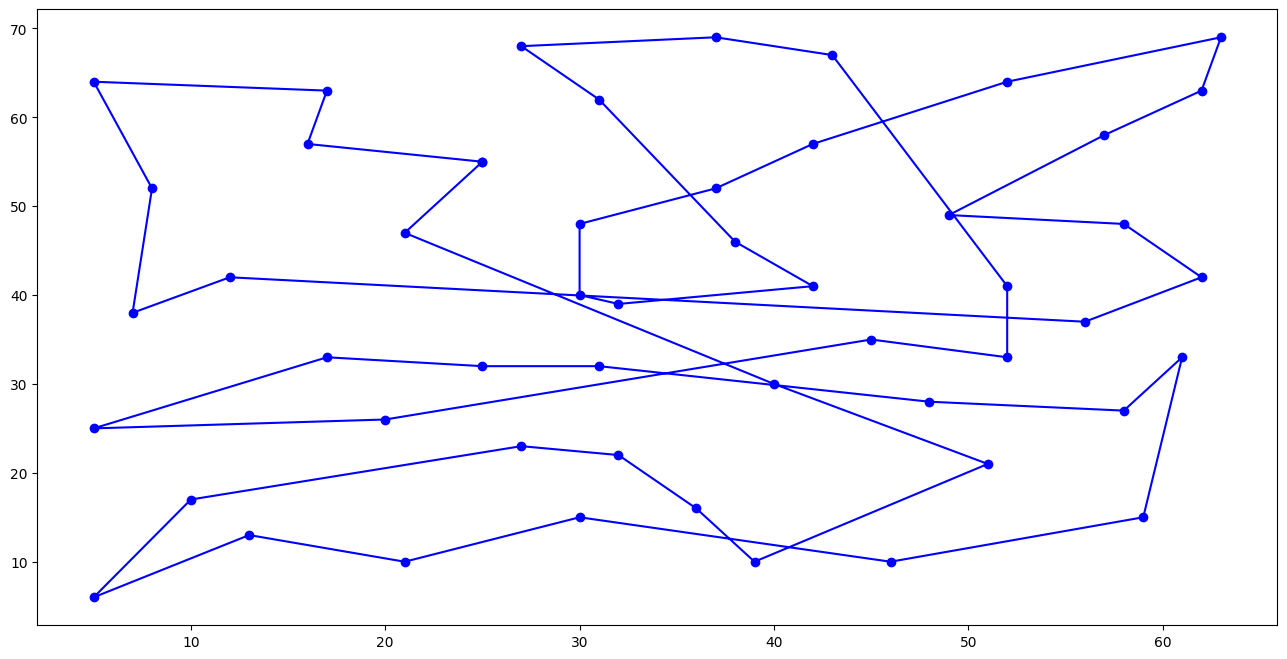

600.4537353515625

In [25]:
problem = mhac.problems.tsp.GA_TSP(read_TSP_data())
GA = mhac.evolutionary.GeneticAlgorithm(problem)
# TODO: consider moving params to the problem instead of solution
GA.setTournamentSize(5)
sol = GA.solve(2000, 10, 0.1, mhac.evolutionary.SelectionType.TOURNAMENT)
displayTour(problem.mCities, sol.tour)
sol.cost